# Примеры лабораторной работы

#### Задание 6.1. 
Создать файл с зашумлением изображения шумом типа соль-перец.

In [1]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
# Создаем 3 возможных цвета - красный, зеленый и синий
red, green, blue = (255, 0, 0), (0, 255, 0), (0, 0, 255)
rgb = [red, green, blue] # Помещаем их в кортеж

In [3]:
# Создаем функцию с параметрами (<наше изображение>,<вероятность зашумления>)
def sp_noise(image, prob):
    # Создаем массив нулей такого же размера и формата как исходное изображение
    output = np.zeros(image.shape, np.uint8)
    thres = 1- prob # Задаем порог
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rnd = random.random()
            if rnd > thres:
                # Задаем пикселю случайное значение из кортежа
                output[i][j] = random.choice(rgb)
            else:
                 # Иначе оставляем пиксель без изменения
                output[i][j] = image[i][j]
    return output

In [4]:
image = cv2.imread('img/cat.jpg')
image = cv2.resize(image, (900, 600))

In [5]:
# Применяем к нашему изображению image, созданную функцию sp_noise,
# где 0.3 - вероятность зашумления пикселя
noise_img = sp_noise(image, 0.3)

# Объединяем оригинальное и зашумленное изображения
# в одно окно (для наглядности)
res = np.hstack((image, noise_img))

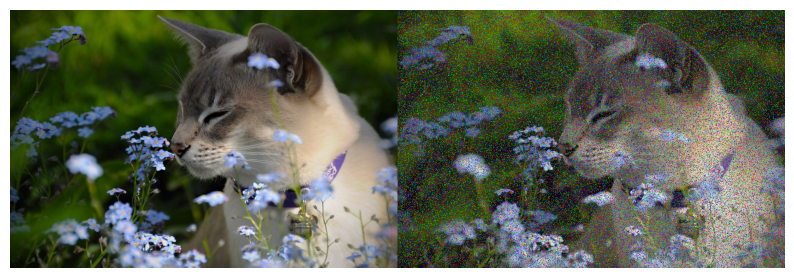

In [72]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB));

### Задание 6.2. 
Провести сглаживание изображения с помощью функции cv2.filter2D(), используя ядро 5×5.

In [9]:
img = cv2.imread('img/cat.jpg')

In [10]:
kernel = np.ones((5, 5), np.float32) / 25
dst = cv2.filter2D(img, -1, kernel)

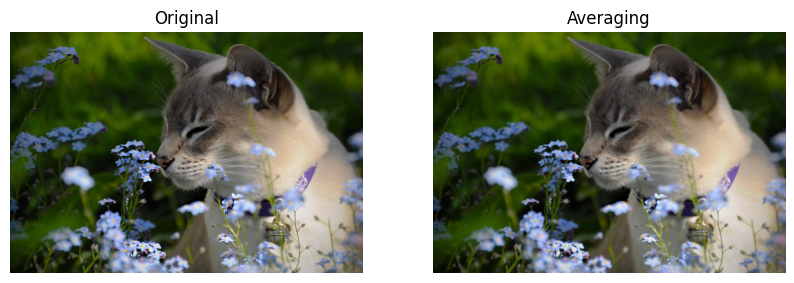

In [22]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Averaging')
plt.axis('off')
plt.show();

### Задание 6.3. 
Провести усреднение изображения с помощью функции cv2.blur(), используя ядро 5×5.

In [14]:
img = cv2.imread('img/cat.jpg')

In [38]:
blur = cv2.blur(img, (50, 20))

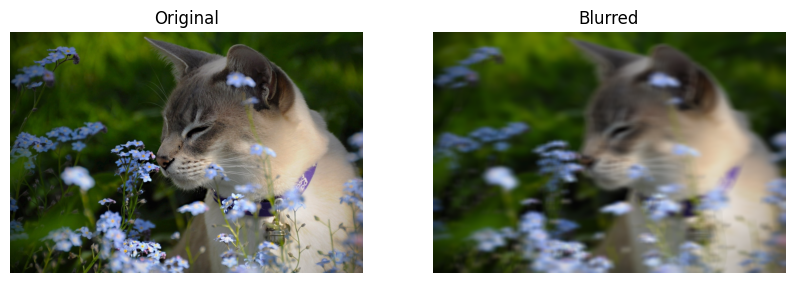

In [39]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title('Blurred')
plt.axis('off')
plt.show();

### Задание 6.4. 
Добавить к исходному изображению 20−30% шума. Провести фильтрацию изображения по Гауссу, используя ядро 10×10.

In [34]:
img = cv2.imread('img/cat.jpg')

In [63]:
blur = cv2.GaussianBlur(img, (5, 5), 20)

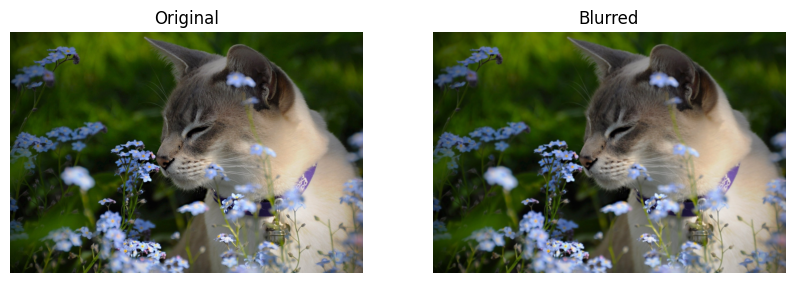

In [64]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.title('Blurred')
plt.axis('off')
plt.show();

### Задание 6.5. 
Добавить к исходному изображению 20–50% шума. Провести медианную фильтрацию изображения, используя ядро 5x5.

In [105]:
img = cv2.imread('img/face.png')

In [106]:
median = cv2.medianBlur(img,13)

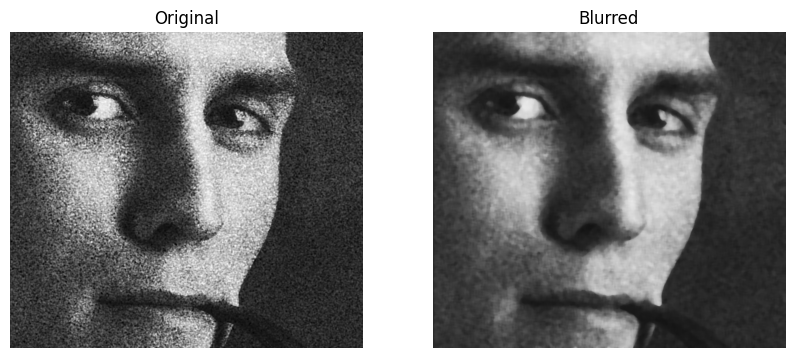

In [107]:
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img), plt.title('Original')
plt.axis('off')
plt.subplot(122),plt.imshow(median), plt.title('Blurred')
plt.axis('off')
plt.show();

### Задание 6.6. 
Создать файл с изображением, в котором обязательно присутствуют вертикальные и горизонтальные линии. С помощью оператора Собеля обнаружить и выделить эти линии.

In [123]:
img = cv2.imread('img/build.jpeg', 0)
img = cv2.resize(img, (900, 600))

In [124]:
# Функция Собеля для вычисления вертикальных линий
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

# То же самое, но 0, 1 означает, что теперь берем производную по y
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

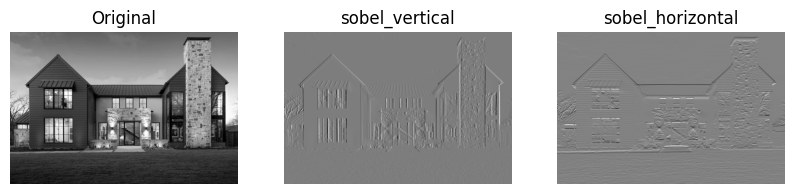

In [125]:
plt.figure(figsize=(10, 10))
plt.subplot(131),plt.imshow(img, cmap = 'gray'), plt.title('Original')
plt.axis('off')

plt.subplot(132),plt.imshow(sobel_vertical, cmap = 'gray'), plt.title('sobel_vertical')
plt.axis('off')

plt.subplot(133),plt.imshow(sobel_horizontal, cmap = 'gray'), plt.title('sobel_horizontal')
plt.axis('off')

plt.show();

### Задание 6.7. 
Сравнить оба способа для горизонтального фильтра Собела с преобразованием в cv2.CV_8U и без него.

In [126]:
img = cv2.imread('img/build.jpeg', 0)

In [127]:
# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F.
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

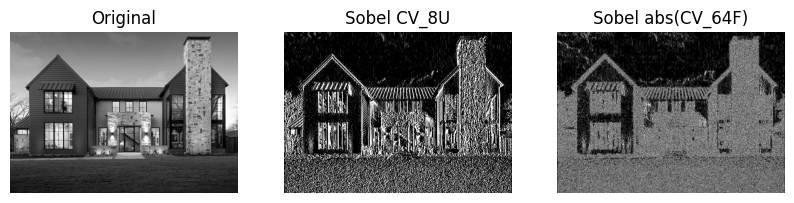

In [128]:
plt.figure(figsize=(10, 10))
plt.subplot(131),plt.imshow(img, cmap = 'gray'), plt.title('Original')
plt.axis('off')

plt.subplot(132),plt.imshow(sobelx8u, cmap = 'gray'), plt.title('Sobel CV_8U')
plt.axis('off')

plt.subplot(133),plt.imshow(sobel_8u, cmap = 'gray'), plt.title('Sobel abs(CV_64F)')
plt.axis('off')

plt.show();

### Задание 6.8. 
Создать файл с изображением, который обязательно содержит вертикальные и горизонтальные линии. С помощью оператора Превитта обнаружить и выделить эти линии.

In [150]:
img = cv2.imread('img/build.jpeg', 0)
img = cv2.resize(img, (900, 600))

In [151]:
xkernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]) # Создаем ядро (маску) для x
ykernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) # Создаем ядро (маску) для Y

In [152]:
# Функция соединения изображения с ядром
img_prewittx = cv2.filter2D(img, -1, xkernel)
img_prewitty = cv2.filter2D(img, -1, ykernel)

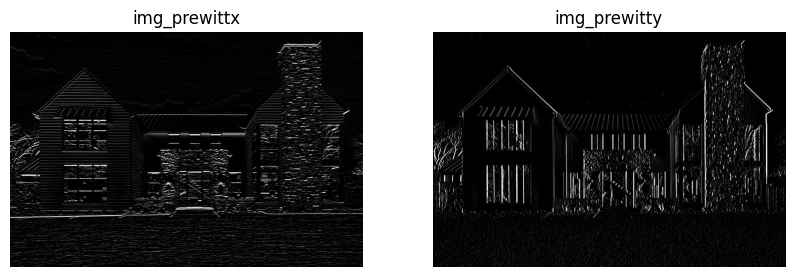

In [138]:
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img_prewittx, cmap = 'gray'), plt.title('img_prewittx')
plt.axis('off')

plt.subplot(122),plt.imshow(img_prewitty, cmap = 'gray'), plt.title('img_prewitty')
plt.axis('off')

plt.show();

### Задание 6.9. 
Используя оператор Робертса, выделить линии на изображении.

In [139]:
img = cv2.imread('img/build.jpeg', 0)
img = cv2.resize(img, (900, 600))

In [140]:
kernel1 = np.array([[1, 0], [0, 1]])
kernel2 = np.array ([[0, 1],[0, 1]])

In [141]:
img_robx = cv2.filter2D(img, -1, kernel1)
img_roby = cv2.filter2D(img, -1, kernel2)

output_image = img_robx + img_roby

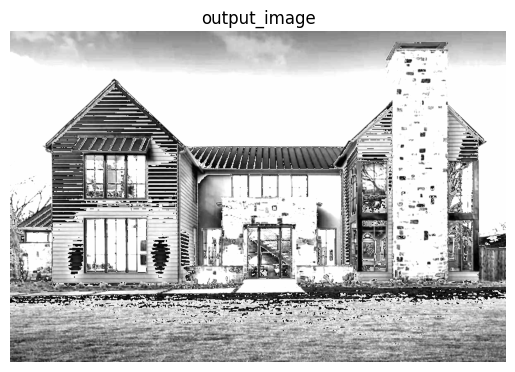

In [143]:
plt.imshow(output_image, cmap = 'gray'), plt.title('output_image')
plt.axis('off')
plt.show();

### Задание 6.10. 
Создать файл с изображением, в котором присутствуют перепады изображения. С помощью оператора Лапласа обнаружить и выделить эти перепады.

In [148]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)

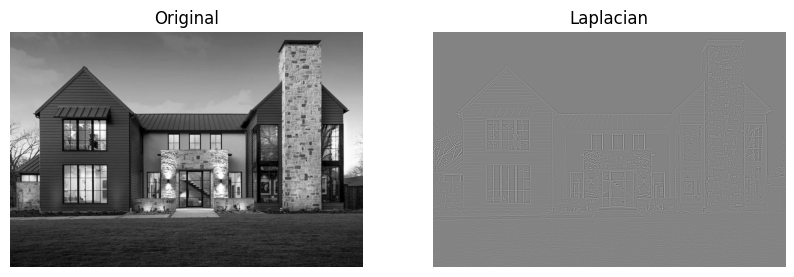

In [149]:
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, cmap = 'gray'), plt.title('Original')
plt.axis('off')

plt.subplot(122),plt.imshow(laplacian, cmap = 'gray'), plt.title('Laplacian')
plt.axis('off')

plt.show();